In [ ]:
'''_In this script, we ..._'''

In [ ]:
# -*- coding: utf-8 -*- #
# Authors: gracecaj@stud.ntnu.no, sbaarak@stud.ntnu.no, & annakale@stud.ntnu.no
# Date: 19/09/2023

In [2]:
#%%
#* Import the code needed
import os
from pathlib import Path
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#%%
#* Define paths
directory_path = Path('../../')

# Import data needed (pop, ppd, type split)

In [4]:
pop = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Population' / 'regression_Population.xlsx',
    index_col=0)

PpD = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'PpD' / 'regression_PpD.xlsx',
    index_col=0)

TS_cj = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'Type_Split' / 'Type_Split_ratios.xlsx',
    index_col=0)

lifetime = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Dwelling_Lifetime' / 'lifetime_regression.xlsx',
    index_col=0)

lifetime_standard_deviation = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Dwelling_Lifetime' / 'lifetime_regression.xlsx',
    index_col=0)

lifetime = lifetime.drop('std_dev', axis=1)
lifetime_standard_deviation = lifetime_standard_deviation.drop('lifetime', axis=1)

lifetime = lifetime.loc[:, 'lifetime'].to_numpy()
lifetime

lifetime_standard_deviation = lifetime_standard_deviation.loc[:, 'std_dev'].to_numpy()

#lifetime = lifetime.transpose()
#lifetime_standard_deviation = lifetime_standard_deviation.transpose()

# Import DSM model


In [5]:
# getting the name of the directory where the this file is present.
current = os.path.dirname(os.path.realpath('this'))
 
# Getting the parent directory name where the current directory is present.
parent = os.path.dirname(current)
#make the UA path
module_path = parent + '/modules'
#append path to options to import from
sys.path.append(module_path)

from dynamic_stock_model import DynamicStockModel

# Use pop and PpD to calculate stock over time

In [6]:
stock_t = np.multiply(pop,PpD)

stock_t_SFH = np.multiply(stock_t,TS_cj['SFH_ratio'])
stock_t_TH = np.multiply(stock_t,TS_cj['TH_ratio'])
stock_t_AB = np.multiply(stock_t,TS_cj['AB_ratio'])

C:\Users\grace\AppData\Local\Temp\ipykernel_35284\669566578.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  stock_t = np.multiply(pop,PpD)
C:\Users\grace\AppData\Local\Temp\ipykernel_35284\669566578.py:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array 

In [7]:
stock_t_SFH

,Population
Year,
1600,1.129272e+06
1601,1.137121e+06
1602,1.144676e+06
1603,1.151944e+06
1604,1.158930e+06
...,...
2046,5.985500e+06
2047,5.980945e+06
2048,5.975777e+06


In [88]:
dwellings_stock_driven = DynamicStockModel(t=np.arange(1600, 2051),
                         s=stock_t_SFH,
                         lt={'Type': 'Normal', 
                             'Mean': [150],
                             'StdDev':[15] 
                             }
                        )

#len(stock_t_SFH.iloc[0]) == len(dwellings_stock_driven.t)

len(stock_t_SFH.iloc[0])
#len(dwellings_stock_driven.t)

inflow_tc = dwellings_stock_driven.compute_i_c_from_s_c(stock_t_SFH.iloc[:,0])
#print(lifetime)
#print(stock_t_SFH.iloc[:,0])
print(dwellings_stock_driven.lt['Mean'][0])
#print(dwellings_stock_driven.lt['Mean'][1][0])

KeyError: 0

In [17]:
type(stock_t_SFH['Population'].to_numpy())

numpy.ndarray

In [7]:


#cohorts = 

dwellings_stock_driven = DynamicStockModel(t=np.arange(1600, 2051),
                         s=stock_t_SFH['Population'].to_numpy(),
                         #s_c = cohorts
                         lt={'Type': 'Normal', 
                             'Mean': lifetime,
                             'StdDev': lifetime_standard_deviation 
                             }
                        )

# Calculate the stock by cohort
dwellings_stock_driven.compute_stock_driven_model(NegativeInflowCorrect = True) 

# Calculate  total outflow
dwellings_stock_driven.compute_outflow_total()

# Calculate the total stock
dwellings_stock_driven.compute_stock_total()

# Calculate the inflow
inflow_t = dwellings_stock_driven.i

# Calculate the outflow
outflow_t = dwellings_stock_driven.o

# Calculate the stock model
stock_tc = dwellings_stock_driven.s_c

i_cj = dwellings_stock_driven.i_c

dwellings_stock_driven.dimension_check()

'<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 451 years.<br>Inflow vector is present with 451 years.<br>Total stock is present with 451 years.<br>Stock by cohorts is present with 451 years and 451 cohorts.<br>Total outflow is present with 451 years.<br>Outflow by cohorts is present with 451 years and 451 cohorts.<br>Lifetime distribution is present with type Normal and mean [186.67 186.48 186.3  186.12 185.93 185.75 185.57 185.38 185.2  185.02\n 184.83 184.65 184.47 184.28 184.1  183.92 183.73 183.55 183.37 183.18\n 183.   182.82 182.63 182.45 182.27 182.08 181.9  181.72 181.53 181.35\n 181.17 180.98 180.8  180.62 180.43 180.25 180.07 179.88 179.7  179.52\n 179.33 179.15 178.97 178.78 178.6  178.42 178.23 178.05 177.87 177.68\n 177.5  177.32 177.13 176.95 176.77 176.58 176.4  176.22 176.03 175.85\n 175.67 175.48 175.3  175.12 174.93 174.75 174.57 174.38 174.2  174.02\n 173.83 173.65 173.47 173.28 173.1  172.92 172.73 172.55 172.37 172.18\n 172.   1

In [43]:
print(i_cj)

None


In [16]:
print(inflow_t)

[1.13081922e+06 7.94314512e+03 7.65415795e+03 7.37085223e+03
 7.09323993e+03 6.82131804e+03 6.55509886e+03 6.29459431e+03
 6.03980313e+03 5.79073759e+03 5.54740960e+03 5.30981958e+03
 5.07797982e+03 4.85190227e+03 4.63158896e+03 4.41705221e+03
 4.20830406e+03 4.00535638e+03 3.80820486e+03 3.61687009e+03
 3.43135696e+03 3.25167803e+03 3.07784562e+03 2.90986594e+03
 2.74775167e+03 2.59151529e+03 2.44116420e+03 2.29671123e+03
 2.15816903e+03 2.02554605e+03 1.89885526e+03 1.77810947e+03
 1.66331808e+03 1.55449417e+03 1.45165068e+03 1.35479782e+03
 1.26394876e+03 1.17911655e+03 1.10031204e+03 1.02754844e+03
 9.60838884e+02 9.00194684e+02 8.45629065e+02 7.97155153e+02
 7.54784571e+02 7.18530469e+02 6.88405909e+02 6.64422635e+02
 6.46593642e+02 6.34931837e+02 6.29448891e+02 6.30157547e+02
 6.37070460e+02 6.50200249e+02 6.69556932e+02 6.95153950e+02
 7.27002194e+02 7.65113568e+02 8.09499871e+02 8.60171271e+02
 9.17139056e+02 9.80414401e+02 1.05000651e+03 1.12592593e+03
 1.20818304e+03 1.296785

In [8]:
dwellings_inflow_driven = DynamicStockModel(t=np.arange(1600, 2051),
                    i=inflow_t,
                    lt={'Type': 'Normal', 
                        'Mean': lifetime,
                        'StdDev': lifetime_standard_deviation 
                        }
                    )
dwellings_inflow_driven.compute_s_c_inflow_driven()
dwellings_inflow_driven.compute_stock_total()
s_c = dwellings_inflow_driven.s_c
s = dwellings_inflow_driven.s

In [47]:
print(s)

[1129271.68976117 1137120.58129264 1144676.25757746 1151944.20624722
 1158929.91488536 1165638.87102527 1172076.56214832 1178248.47568168
 1184160.09899617 1189816.91940392 1195224.42415591 1200388.10043943
 1205313.43537537 1210005.9160154  1214471.02933901 1218714.26225036
 1222741.10157507 1226557.03405672 1230167.54635328 1233578.12503334
 1236794.2565721  1239821.42734725 1242665.12363455 1245330.83160331
 1247824.03731152 1250150.22670086 1252314.88559137 1254323.49967594
 1256181.55451446 1257894.53552777 1259467.92799124 1260907.21702809
 1262217.88760237 1263405.42451163 1264475.31237917 1265433.03564604
 1266284.07856251 1267033.92517932 1267688.0593383  1268251.96466278
 1268731.12454734 1269131.02214722 1269457.14036719 1269714.96184988
 1269909.96896362 1270047.64378963 1270133.46810875 1270172.92338743
 1270171.49076314 1270134.65102911 1270067.88461835 1269976.67158696
 1269866.49159667 1269742.82389661 1269611.14730423 1269476.94018534
 1269345.68043332 1269222.84544734

In [11]:
s_c

s_c_dataframe = pd.DataFrame(s_c)
s_c_dataframe = s_c_dataframe.drop(columns=0)
s_c_dataframe

,1,2,3,4,5,6,7,8,9,10,...,441,442,443,444,445,446,447,448,449,450
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,7932.320398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,7931.735745,7643.776372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,7931.122400,7643.214586,7360.902334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,7930.479121,7642.625175,7360.362880,7083.705294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.129228,0.128495,0.127688,0.126717,0.125758,0.124723,0.123522,0.122330,0.121059,0.119624,...,47134.417965,46714.638116,46194.457057,45838.148643,45220.307961,44859.675760,0.000000,0.000000,0.000000,0.000000
447,0.120441,0.119759,0.119008,0.118104,0.117212,0.116248,0.115129,0.114020,0.112836,0.111499,...,47134.345134,46714.579330,46194.410349,45838.111250,45220.278502,44859.652364,44368.946491,0.000000,0.000000,0.000000
448,0.112224,0.111590,0.110891,0.110049,0.109218,0.108321,0.107280,0.106247,0.105145,0.103900,...,47134.257521,46714.508428,46194.353854,45838.065899,45220.242670,44859.623828,44368.924116,43735.068484,0.000000,0.000000
449,0.104542,0.103952,0.103301,0.102517,0.101745,0.100910,0.099940,0.098979,0.097953,0.096794,...,47134.152320,46714.423069,46194.285647,45838.010999,45220.199169,44859.589088,44368.896795,43735.046932,43303.346792,0.000000


Text(0, 0.5, 'dwellings')

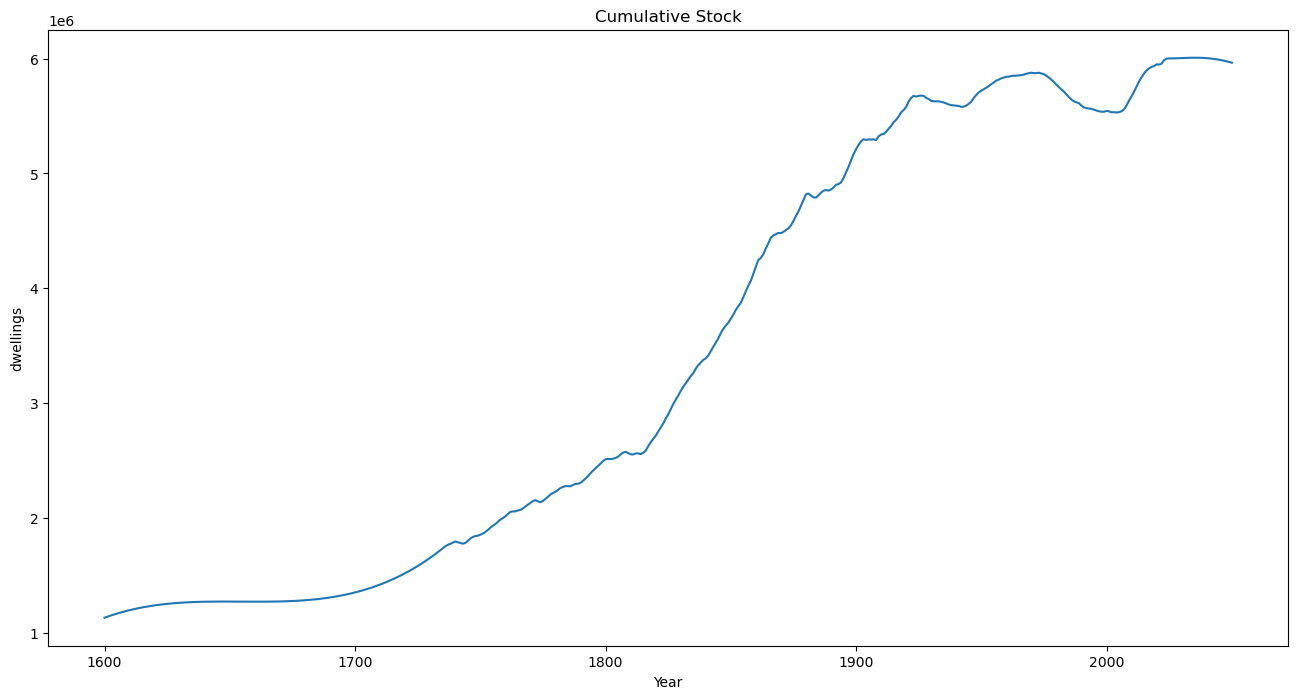

In [50]:
plt.figure(figsize=(16, 8))
plt.plot(dwellings_inflow_driven.t, dwellings_inflow_driven.s)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')
#plt.fill_between(cars_future_data.t, cars_future_data.s, facecolor='blue', alpha=0.5)

Text(0, 0.5, 'dwellings')

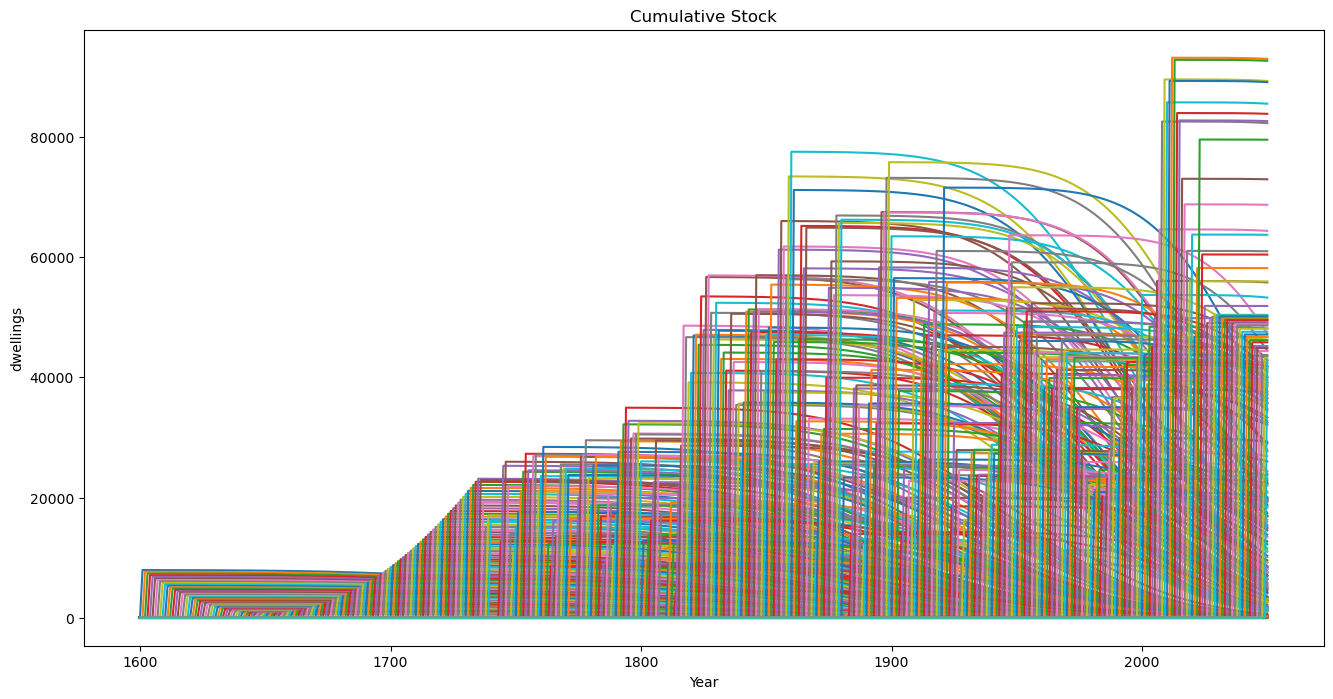

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(dwellings_inflow_driven.t, s_c_dataframe)
plt.title('Cumulative Stock')
plt.xlabel('Year')
plt.ylabel('dwellings')

# Enter stock into stock driven model to get inflows by cohort over time

In [47]:
from dynamic_stock_model import DynamicStockModel

#! The following function and runs of it should effectively iterate things over for each of the types

def stock_model(stock):
    dwellings_stock_driven = DynamicStockModel(t=np.arange(1600, 2051),
                         s=stock,
                         lt={'Type': 'Normal', 
                             'Mean': lifetime,
                             'StdDev':lifetime_standard_deviation
                             }
                        )
    #inflow_tc = dwellings_stock_driven.i_c

    dwellings_stock_driven.compute_stock_driven_model(NegativeInflowCorrect = True)
    inflow_t = dwellings_stock_driven.i
    

     
    inflow_tcj = np.multiply(inflow_tc,TS_cj)
    
    dwellings_inflow_driven = DynamicStockModel(t=np.arange(1600, 2051),
                        i=inflow_tcj,
                        lt={'Type': 'Normal', 
                            'Mean': lifetime,
                            'StdDev': lifetime_standard_deviation 
                            }
                        )
    dwellings_inflow_driven.compute_s_c_inflow_driven()
    return dwellings_inflow_driven.s_c

s_c_SFH = stock_model(stock_t_SFH)
s_c_TH = stock_model(stock_t_TH)
s_c_AB = stock_model(stock_t_AB)

#! make some kind of stacked line chart with this. also compute sum

s_c_total = s_c_SFH + s_c_TH + s_c_AB




#! I'm not sure if we can use a vector of different lifetime values or if there can only be one constant. Check DSM module

dwellings_stock_driven = DynamicStockModel(t=np.arange(1600, 2050),
                         s=stock_t,
                         lt={'Type': 'Normal', 
                             'Mean': [lifetime],
                             'StdDev':[lifetime_standard_deviation] 
                             }
                        )

#! I think the following will work but I'm not 100% sure
# Calculate the inflow
inflow_tc = dwellings_stock_driven.i_c

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

# multiply inflow by type split to get inflow by type split and cohort

In [ ]:
inflow_tcj = np.multiply(inflow_tc,TS_cj)

# enter inflow by type split and cohort into inflow driven model to get stock by cohort and type split over time

In [ ]:
# Define our dynamic stock model using our data and parameters
dwellings_inflow_driven = DynamicStockModel(t=np.arange(1600, 2050),
                        i=inflow_tcj,
                        lt={'Type': 'Normal', 
                            'Mean': np.array([lifetime]),
                            'StdDev': np.array([lifetime_standard_deviation]) 
                            }
                        )


#! I think the following will work but I'm not 100% sure
# Calculate the stock by cohort
dwellings_inflow_driven.compute_s_c_inflow_driven()
s_c = dwellings_inflow_driven.s_c
